# Titanic dataset

Load the titanic dataset using seaborn. pip install seaborn, 'import seaborn as sns', then load using 'sns.load_dataset('titanic')'


In [88]:
#initialisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
titanic_df = sns.load_dataset("titanic")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Clean the dataset: 

- Where are the missing values, can they be filled/need to be dropped?
    - df.isnull()
    - df.fillna()
    - df.dropna() 
- Are there any duplicates?
    - df.duplicated()
    - df.drop_duplicates()
- Do any columns need renaming?
    - df.rename() 
- Any other data quality concepts you can check?

In [90]:
#python
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We notice that there are 688 nulls for deck, which is a very significant amount. So we drop the deck column.

In [91]:
titanic_df = titanic_df.drop(columns=["deck"])
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

We can drop the rows where embarked and embark_town is null

In [92]:
titanic_df = titanic_df.dropna(subset=['embarked','embark_town'])
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

Finally, we see there is a singificant number of nulls for age. We can either fill these with the median value, or drop these rows. Why not both!

In [93]:
titanic_fill_age_df = titanic_df.copy()
titanic_no_fill_age_df = titanic_df.copy()

titanic_fill_age_df['age'] = titanic_fill_age_df['age'].fillna(value=titanic_df['age'].median())
titanic_no_fill_age_df = titanic_no_fill_age_df.dropna()

In [94]:
duplicated = titanic_fill_age_df.duplicated().sum()
duplicated2 = titanic_no_fill_age_df.duplicated().sum()
print(f"There are {duplicated} duplicate rows in the dataframe")
print(f"There are {duplicated2} duplicate rows in the dataframe")

There are 116 duplicate rows in the dataframe
There are 38 duplicate rows in the dataframe


Now we drop the duplicate rows

In [95]:
titanic_fill_age_df = titanic_fill_age_df.drop_duplicates()
titanic_no_fill_age_df = titanic_no_fill_age_df.drop_duplicates()

In [96]:
print(f"The filled age data frame with filled ages has {titanic_fill_age_df.shape[0]} entries, {titanic_fill_age_df.duplicated().sum()} duplicates, and {titanic_fill_age_df.isna().sum().sum()} null values")
print(f"The non-filled age data frame with filled ages has {titanic_no_fill_age_df.shape[0]} entries, {titanic_no_fill_age_df.duplicated().sum()} duplicates, and {titanic_no_fill_age_df.isna().sum().sum()} null values")

The filled age data frame with filled ages has 773 entries, 0 duplicates, and 0 null values
The non-filled age data frame with filled ages has 674 entries, 0 duplicates, and 0 null values



**From now on we will be looking at the data frame where we dropped the null age columns**

Let's rename some columns


In [97]:
print(list(titanic_no_fill_age_df.columns))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


In [98]:
rename_columns = {'sibsp':'siblings_and_spouses',
                  'parch':'parents_and_children',
                  'embarked':'embark_port'}
titanic_no_fill_age_df = titanic_no_fill_age_df.rename(columns=rename_columns)
print(list(titanic_no_fill_age_df.columns))

['survived', 'pclass', 'sex', 'age', 'siblings_and_spouses', 'parents_and_children', 'fare', 'embark_port', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


## Check the descriptive statistics
- df.describe()

In [99]:
titanic_fill_age_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,0.411384,2.249677,29.528357,0.530401,0.421734,34.761659
std,0.492403,0.852315,13.731264,0.991241,0.841380,52.425906
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What we can infer from this data:
- only 41.1% of the passengers in this list survived
- There were more entries for people in 3rd class than 1st
- The mean age was 29.5


## Find the average fare and age for each class 
- df.groupby()
- mean()

In [100]:
titanic_no_fill_age_df[['class','age','fare']].groupby(['class'],observed=True).mean()


,age,fare
class,,
First,38.051758,88.489035
Second,29.859684,22.168223
Third,25.180150,13.377507


Here we see the average (mean) age and fare for each class.
As expected, the lower the class the lower the average fare. Additionally, the average age increases as class goes up. We ponder if as age increases, accumulated wealth is likely to increase and thus the class of ticket able to be afforded increases.


Let's graph this

<Axes: xlabel='class', ylabel='fare'>

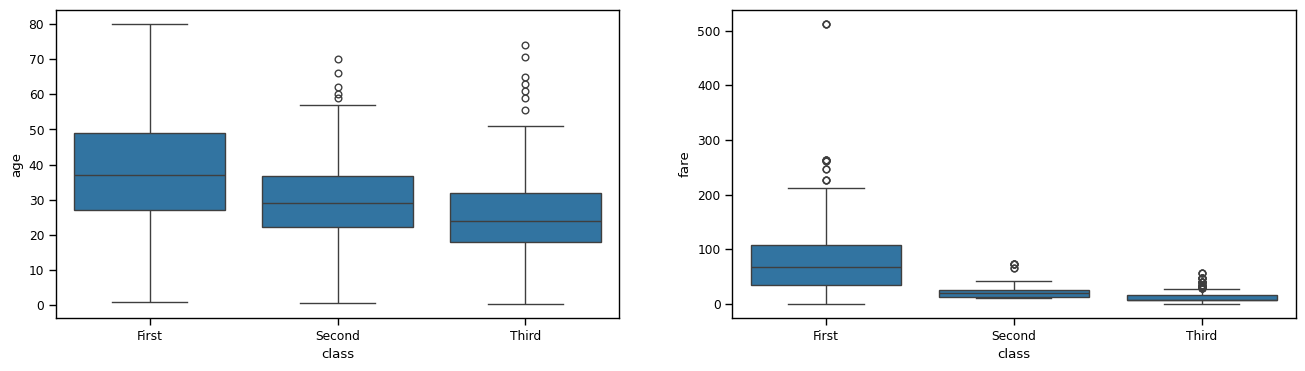

In [124]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data=titanic_no_fill_age_df, x = 'class', y='age', ax=ax[0])
sns.boxplot(data=titanic_no_fill_age_df, x = 'class', y='fare', ax=ax[1])

One clear detail shown by the graphs is that there is an outlier for the first class fare that is massively larger than the rest of the entries.

## Add a new column showing the fare as a percentage of total

In [115]:
titanic_no_fill_age_df['percentage_fare_of_total'] = 100*titanic_no_fill_age_df.fare/titanic_no_fill_age_df.fare.sum()
titanic_no_fill_age_df

,survived,pclass,sex,age,siblings_and_spouses,parents_and_children,fare,embark_port,class,who,adult_male,embark_town,alive,alone,percentage_fare_of_total
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0.030113
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0.296080
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.032917
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.220555
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.033436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True,0.043612
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,0.120973
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0.124607
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0.124607


## How many survivors were female compared to male?

In [128]:
df = titanic_no_fill_age_df.loc[(titanic_no_fill_age_df['survived']==1)].groupby(['sex'])[['survived']].count()
display(df)

,survived
sex,
female,189
male,92


There were 102 more female survivors than male. Let's make this into a pie chart.

What about in children?


In [103]:
#titanic_no_fill_age_df.loc[(titanic_no_fill_age_df['survived']==1) & (titanic_no_fill_age_df['age'] < 18)].groupby(['sex'])[['survived']].count()
pd.crosstab(titanic_no_fill_age_df['sex'],titanic_no_fill_age_df['survived'])

survived,0,1
sex,,
female,64,189
male,329,92


## What interesting insights can you draw?

Let's group the entries into age groups

In [104]:
new_df = titanic_no_fill_age_df[['survived','sex','age']].copy()

In [105]:
bins = [0,2,4,13,18,30,45,65,110]
labels = ['Infant','Toddler','Child','Teen','Young Adult','Middle-Aged','Older Adult','OAP']
new_df['Age Group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)

Let's see what the age group distribution is for survival by gender

In [117]:
#new_df.groupby(['survived','Age Group','sex']).count()
pd.crosstab([new_df['Age Group'],new_df['sex']],new_df['survived'])

survived              0   1
Age Group   sex            
Infant      female    0   3
            male      2   8
Toddler     female    5   3
            male      3   5
Child       female    8  12
            male     11   8
Teen        female    4  19
            male     17   2
Young Adult female   25  64
            male    133  28
Middle-Aged female   15  61
            male     99  27
Older Adult female    7  27
            male     54  13
OAP         male     10   1

## Now for graphs
#### Age and Surivival


Firstly, let's see if we can make a bar chart for survival numbers by age group and gender

<Axes: xlabel='Age Group', ylabel='survived'>

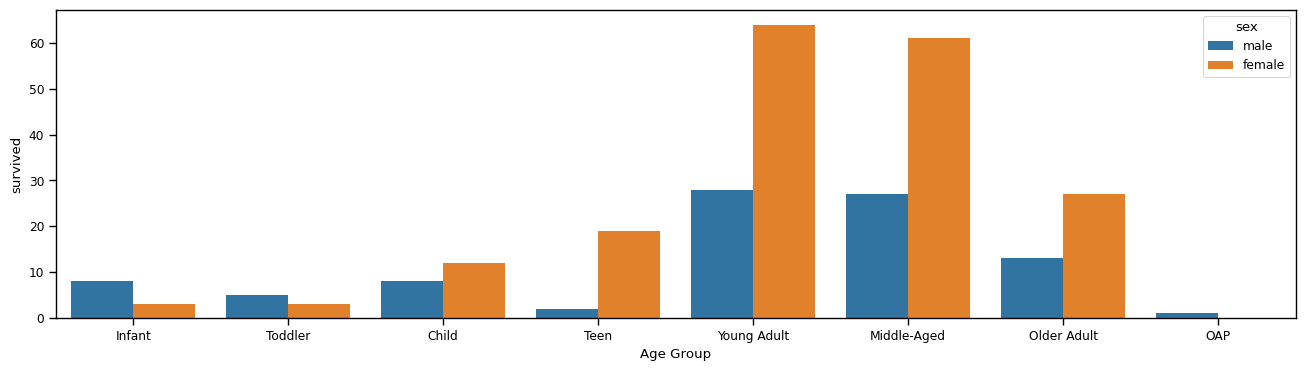

In [114]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(data=new_df, x='Age Group', y = 'survived', hue='sex', errorbar=None, estimator='sum')


As expected, the number of female survivors - especially in adults - was much greater. In infants, toddlers, and children the numbers are closer, perhaps we should look at the percentage survivorship 

<Axes: xlabel='Age Group', ylabel='survived'>

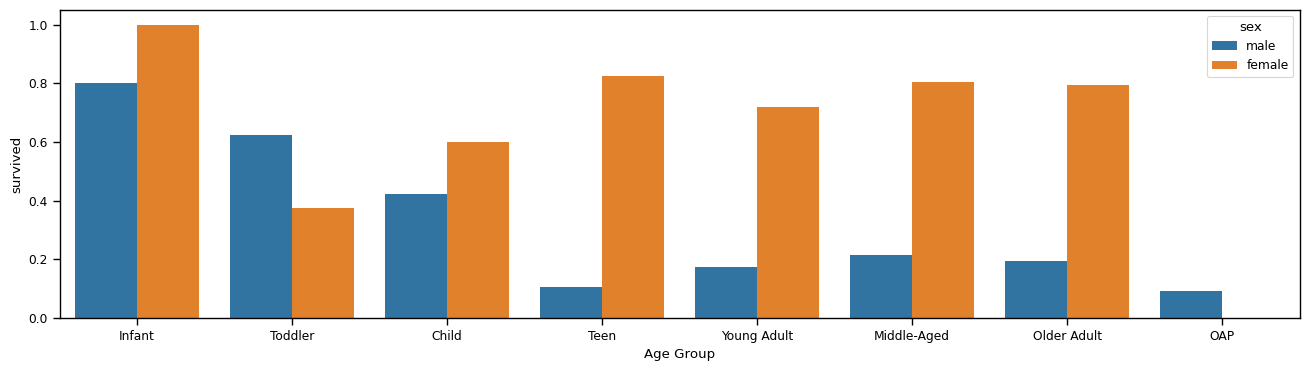

In [118]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(data=new_df, x='Age Group', y = 'survived', hue='sex', errorbar=None, estimator='mean')

This gives an even clearer view of the survivorship rates between sex by age

#### Heatmap

Let's take a look at how the different variables correlate to eachother

In [108]:
tc = pd.get_dummies(titanic_no_fill_age_df[['survived', 'pclass', 'sex', 'age', 'siblings_and_spouses', 'parents_and_children', 'fare', 'adult_male', 'embark_town', 'alone']])

<Axes: >

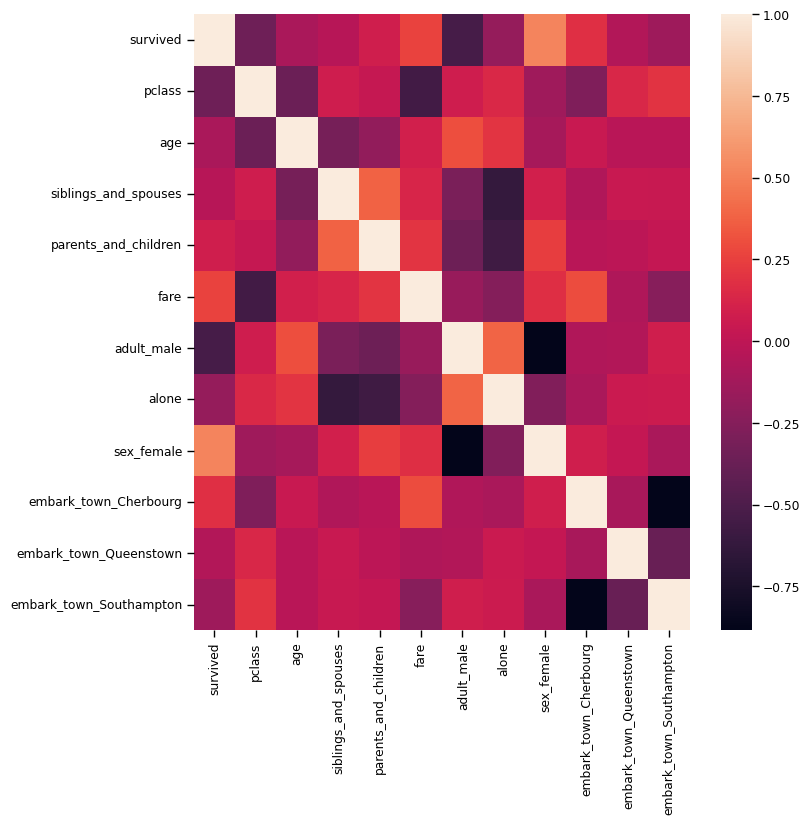

In [113]:
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(tc.drop(columns=['sex_male']).corr())

There are some obvious correlations here:
- adult_male has a negative correlation to sex_female
- alone has a negative correlation to siblings_and_spouses and parents_and_children
- fare and class have a negative correlation (because as class number increases (1,2,3) the value of that class is less (1=First class)

However there are also some correlations to notes:
- survived has a negative correlation to adult_male, through historical context we know that for the limited lifeboats, it was women and children first
- similarly, survived has a negative correlation to class. Again, we know that you were more likely to have a lifeboat if you were in a better class
- adult_male and alone have a positive correlation implying most people who were alone, were adult males
- age and class have a negative correlation, which fits with our previouse analysis that of the mean ages per class


Now lets look at the distribution of ages

<Axes: xlabel='age', ylabel='Count'>

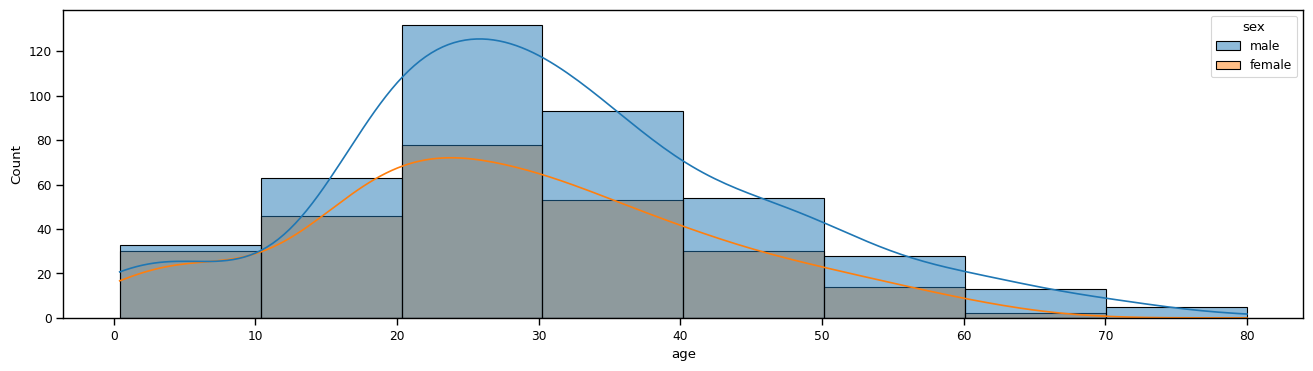

In [131]:
sns.histplot(data=titanic_no_fill_age_df, x='age',kde=True, bins=8, hue='sex')